# Explore here

In [8]:
import os
import pandas as pd
#import seaborn as sns
from dotenv import load_dotenv
import spotipy

# load the .env file variables
load_dotenv()



True

In [ ]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.9 MB/s eta 0:00:0000:01


In [14]:
from dotenv import load_dotenv
load_dotenv("/workspaces/interacting-with-api-python-project-tutorial-biel/src/credentials.env")

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

print(client_id)

5447a5649cdd44eaa3a97f1955449429


In [31]:
from spotipy.oauth2 import SpotifyClientCredentials
import string

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

id_artist = "38EmEgXkgK51MT2tPY0EoC"

lz_uri = 'spotify:artist:38EmEgXkgK51MT2tPY0EoC'
results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print (f" Track: {track['name']}")
    print (f" Duración: {track['duration_ms']}")
    print (f" Popularidad: {track['popularity']}")
    print()

 Track: Jingle Bell Rock
 Duración: 130973
 Popularidad: 91

 Track: Jingle Bell Rock (with Maria Becerra)
 Duración: 141818
 Popularidad: 55

 Track: Captain Santa Claus (And His Reindeer Space Patrol)
 Duración: 151533
 Popularidad: 30

 Track: Jingle Bell Rock (Special Nashville Edition)
 Duración: 138226
 Popularidad: 43

 Track: My Special Angel
 Duración: 179293
 Popularidad: 39

 Track: I Wanna Go To Santa Claus Land
 Duración: 103080
 Popularidad: 36

 Track: Santa Claus Is Coming To Town
 Duración: 110306
 Popularidad: 35

 Track: Fraulein
 Duración: 161453
 Popularidad: 11

 Track: Here Comes Santa Claus
 Duración: 127040
 Popularidad: 32

 Track: Jingle Bell Rock - Ryan Riback Remix
 Duración: 138986
 Popularidad: 28



In [61]:
data = []
top_track = results['tracks'[:10]]
for track in top_track:
    name= track['name']
    duration= round((track['duration_ms'])/60000,2)
    popularity= track['popularity']
    data.append ((name, duration, popularity))

df = pd.DataFrame(data,columns=['Cancion','Duracion','Popularidad'])

df_sorted = df.sort_values(by='Popularidad', ascending=True)


df_sorted[:3]

,Cancion,Duracion,Popularidad
7,Fraulein,2.69,11
9,Jingle Bell Rock - Ryan Riback Remix,2.32,28
2,Captain Santa Claus (And His Reindeer Space Pa...,2.53,30


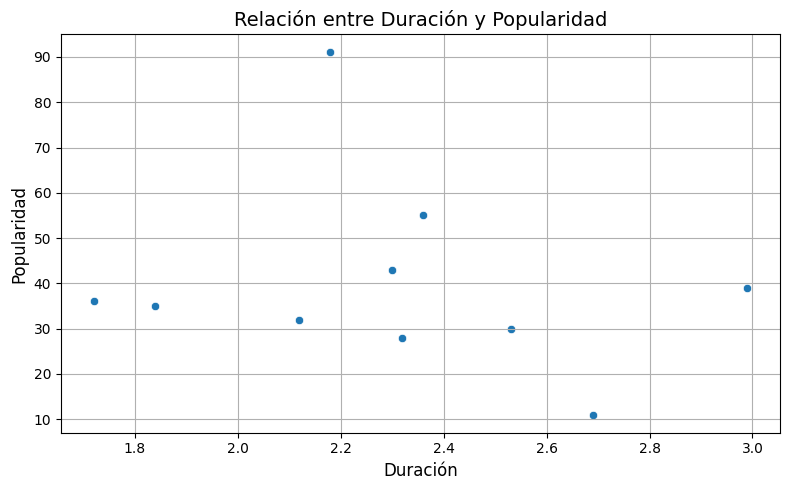

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_sorted, x='Duracion', y='Popularidad')

plt.title('Relación entre Duración y Popularidad', fontsize=14)
plt.xlabel('Duración', fontsize=12)
plt.ylabel('Popularidad', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

In [64]:
conclusion = 'Una vez observado los resultados en el gráfico, podemos concluir que no presenta una relación entre la duración de la canción con su popularidad'
conclusion

'Una vez observado los resultados en el gráfico, podemos concluir que no presenta una relación entre la duración de la canción con su popularidad'